# Predicting Premier League Matches
> Using Python and Random Forests to predict football matches

- toc: true 
- badges: true
- comments: true
- categories: [Random Forests, Football, Premier League,Python]

![](ghtop_images/header2.png)

## Overview

### Introduction

Predicting results of [English Premier League](https://en.wikipedia.org/wiki/Premier_League) using random forests for the 2022 and 2021 seasons. I will predict whether a result is a win, loss or draw.

From an article about pundit versus gambling company [Pinnacle vs. Mark Lawrenson](https://www.pinnacle.com/en/betting-articles/Soccer/Mark-Lawrenson-vs-Pinnacle-Sports/VGJ296E4BSYNURUB) we have a benchmark to aim for from the 2012 season:
- Mark Lawrenson = 52.6% accuracy
- Pinnacle traders = 55.3% accuracy
- Random guess = 33.3% accuracy

### Method

In this data there are various parameters that can be used. The most important step is to not to use data about a current match as a predictor, but for a prediction to be based on stats from previous matches. (A couple of slight exceptions to this are below.)

The predictors used here include:
- date of match
- home or away
- stats from previous matches
    - results
    - goals scored/conceded
    - possession/expected goals etc
- who is playing who
- details of match, limited to those that could be predicted beforehand
    - referee
    - captain
    - formation
    - attendance

Some details on the machine learning:

- A Random Forest [Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) was used for analysis. 
- Data is trained on the first 28 game weeks- the other 10 are used for validation
    - 23% validation / 77% training
- Some data cleaning methods were performed and shown in the code

### Results

- Model accuracy = 51.5% (+-1%)
    - So the model is comparable with the results of Mark Lawrenson
- Draws are under-represented by the model
    - draws predicted was increased by adjusting the input parameter `class_weight` but the issue was only reduced 
- Changing input parameters was done in a semi-manual manner, obtaining the best input parameters was not easy
- The stats from the last 5 games are the best parameters in predicting results

The model is okay as it matches the accuracy from an expert pundit. But it does underperform gambing predictions. 

I would say the model probably needs more data to compete and outperform both of the controls consistently.


### Code- Prepare the data

Data is prepared in a separate page- [Predicting Premier League Matches- Prepare the data](https://thomashsimm.com/pandas/football/premier%20league/python/2022/08/11/PredictingPremierLeagueMatches-PrepareTheData.html#Save-the-data)


## Load data and libraries

In [448]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
cwd=os.getcwd()


In [449]:
cwd=os.getcwd()
folda=cwd+"/data/epl/"
dira = os.listdir(folda)
dira


['dfEPL_2017.csv',
 'dfEPL_2018.csv',
 'dfEPL_2019.csv',
 'dfEPL_2020.csv',
 'dfEPL_2021.csv',
 'epl2017-2021.csv',
 'epl2017-2021_wivnetscore.csv']

In [450]:
#collapse-output

dfAll=pd.read_csv(folda+'epl2017-2021.csv')
dfAll

,Unnamed: 0,round,day,result_x,gf_x,ga_x,opponent_x,gls_x,sh_shooting_x,sot_x,...,int_misc_y,tklw_misc_y,pkwon_y,pkcon_y,og_y,recov_y,won_y,lost_y,won%_y,team_y
0,1,1,13,NaN,NaN,NaN,West Ham United,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West Ham United
1,4,1,12,NaN,NaN,NaN,Burnley,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Burnley
2,5,1,11,NaN,NaN,NaN,Leicester City,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Leicester City
3,7,1,12,NaN,NaN,NaN,Stoke City,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stoke City
4,9,1,13,NaN,NaN,NaN,Tottenham Hotspur,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tottenham Hotspur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,3788,38,22,1.666667,2.666667,0.333333,West Ham United,2.666667,15.666667,6.333333,...,12.666667,6.666667,0.000000,0.333333,0.333333,62.333333,14.333333,15.000000,49.066667,West Ham United
1896,3791,38,22,1.666667,1.333333,0.666667,Manchester United,1.333333,14.666667,5.000000,...,19.333333,11.333333,0.333333,0.000000,0.000000,68.000000,17.000000,13.333333,56.733333,Manchester United
1897,3792,38,22,1.333333,2.000000,1.666667,Leeds United,1.666667,16.000000,5.000000,...,12.000000,11.666667,0.000000,0.000000,0.000000,80.000000,12.000000,16.333333,42.933333,Leeds United
1898,3797,38,22,0.666667,1.000000,1.666667,Newcastle United,1.000000,13.000000,4.333333,...,14.666667,13.000000,0.000000,0.000000,0.000000,64.333333,20.000000,19.000000,48.766667,Newcastle United


In [451]:
#collapse-output
with pd.option_context("display.max_columns", None):
    display(dfAll.describe(include='all'))

,Unnamed: 0,round,day,result_x,gf_x,ga_x,opponent_x,gls_x,sh_shooting_x,sot_x,sot%_x,g/sh_x,g/sot_x,dist_x,fk_shooting_x,pk_x,pkatt_shooting_x,xg_x,npxg_x,npxg/sh_x,g-xg_x,np:g-xg_x,sota_x,saves_x,save%_x,cs_x,psxg_x,psxg+/-_x,pkatt_keeper_x,pka_x,pksv_x,pkm_x,cmp_keeper_x,att_keeper_x,cmp%_keeper_x,att_keeper.1_x,thr_x,launch%_x,avglen_x,att_keeper.2_x,launch%.1_x,avglen.1_x,opp_x,stp_x,stp%_x,#opa_x,avgdist_x,cmp_passing_x,att_passing_x,cmp%_passing_x,totdist_passing_x,prgdist_passing_x,cmp_passing.1_x,att_passing.1_x,cmp%_passing.1_x,cmp_passing.2_x,att_passing.2_x,cmp%_passing.2_x,cmp_passing.3_x,att_passing.3_x,cmp%_passing.3_x,ast_x,xa_x,kp_x,1/3_passing_x,ppa_x,crspa_x,prog_passing_x,att_passing_types_x,live_passing_types_x,dead_x,fk_passing_types_x,tb_x,press_passing_types_x,sw_x,crs_passing_types_x,ck_x,in_x,out_x,str_x,ground_x,low_x,high_x,left_x,right_x,head_x,ti_x,other_x,cmp_passing_types_x,off_passing_types_x,out.1_x,int_passing_types_x,blocks_passing_types_x,sca_x,passlive_x,passdead_x,drib_x,sh_gca_x,fld_gca_x,def_x,gca_x,passlive.1_x,passdead.1_x,drib.1_x,sh_gca.1_x,fld_gca.1_x,def.1_x,tkl_x,tklw_defense_x,def 3rd_defense_x,mid 3rd_defense_x,att 3rd_defense_x,tkl.1_x,att_defense_x,tkl%_x,past_x,press_defense_x,succ_defense_x,%_x,def 3rd_defense.1_x,mid 3rd_defense.1_x,att 3rd_defense.1_x,blocks_defense_x,sh_defense_x,shsv_x,pass_x,int_defense_x,clr_x,err_x,poss_x,touches_x,def pen_x,def 3rd_possession_x,mid 3rd_possession_x,att 3rd_possession_x,att pen_x,live_possession_x,succ_possession_x,att_possession_x,succ%_x,#pl_x,megs_x,carries_x,totdist_possession_x,prgdist_possession_x,prog_possession_x,1/3_possession_x,cpa_x,mis_x,dis_x,targ_x,rec_x,rec%_x,prog_possession.1_x,crdy_x,crdr_x,2crdy_x,fls_x,fld_misc_x,off_misc_x,crs_misc_x,int_misc_x,tklw_misc_x,pkwon_x,pkcon_x,og_x,recov_x,won_x,lost_x,won%_x,team_x,season,month,year,weekday,Win_x,result_y,gf_y,ga_y,opponent_y,gls_y,sh_shooting_y,sot_y,sot%_y,g/sh_y,g/sot_y,dist_y,fk_shooting_y,pk_y,pkatt_shooting_y,xg_y,npxg_y,npxg/sh_y,g-xg_y,np:g-xg_y,sota_y,saves_y,save%_y,cs_y,psxg_y,psxg+/-_y,pkatt_keeper_y,pka_y,pksv_y,pkm_y,cmp_keeper_y,att_keeper_y,cmp%_keeper_y,att_keeper.1_y,thr_y,launch%_y,avglen_y,att_keeper.2_y,launch%.1_y,avglen.1_y,opp_y,stp_y,stp%_y,#opa_y,avgdist_y,cmp_passing_y,att_passing_y,cmp%_passing_y,totdist_passing_y,prgdist_passing_y,cmp_passing.1_y,att_passing.1_y,cmp%_passing.1_y,cmp_passing.2_y,att_passing.2_y,cmp%_passing.2_y,cmp_passing.3_y,att_passing.3_y,cmp%_passing.3_y,ast_y,xa_y,kp_y,1/3_passing_y,ppa_y,crspa_y,prog_passing_y,att_passing_types_y,live_passing_types_y,dead_y,fk_passing_types_y,tb_y,press_passing_types_y,sw_y,crs_passing_types_y,ck_y,in_y,out_y,str_y,ground_y,low_y,high_y,left_y,right_y,head_y,ti_y,other_y,cmp_passing_types_y,off_passing_types_y,out.1_y,int_passing_types_y,blocks_passing_types_y,sca_y,passlive_y,passdead_y,drib_y,sh_gca_y,fld_gca_y,def_y,gca_y,passlive.1_y,passdead.1_y,drib.1_y,sh_gca.1_y,fld_gca.1_y,def.1_y,tkl_y,tklw_defense_y,def 3rd_defense_y,mid 3rd_defense_y,att 3rd_defense_y,tkl.1_y,att_defense_y,tkl%_y,past_y,press_defense_y,succ_defense_y,%_y,def 3rd_defense.1_y,mid 3rd_defense.1_y,att 3rd_defense.1_y,blocks_defense_y,sh_defense_y,shsv_y,pass_y,int_defense_y,clr_y,err_y,poss_y,touches_y,def pen_y,def 3rd_possession_y,mid 3rd_possession_y,att 3rd_possession_y,att pen_y,live_possession_y,succ_possession_y,att_possession_y,succ%_y,#pl_y,megs_y,carries_y,totdist_possession_y,prgdist_possession_y,prog_possession_y,1/3_possession_y,cpa_y,mis_y,dis_y,targ_y,rec_y,rec%_y,prog_possession.1_y,crdy_y,crdr_y,2crdy_y,fls_y,fld_misc_y,off_misc_y,crs_misc_y,int_misc_y,tklw_misc_y,pkwon_y,pkcon_y,og_y,recov_y,won_y,lost_y,won%_y,team_y
count,1900.000000,1900.000000,1900.000000,1887.000000,1887.000000,1887.000000,1900,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1886.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,188

In [452]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from dtreeviz.trees import *
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *

from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV

#### Train / Valid split

In this case valid is actually test as train will be split by fits into train and valid

In [453]:
import copy
df=copy.copy(dfAll)
sza=np.shape(df)[0]

randAr=np.random.randint(0,100, size=sza)
cond = randAr>=15

cond = df.season<2021

train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]



splits = (list(train_idx),list(valid_idx))

valid_idx.shape[0]/len(df)

0.2

In [454]:
want_binary=0
if want_binary==1:
    df.loc[df['Win_x']=='D','Win_x']='L'

#### Create tabular pandas & x and y values

In [455]:
dep_var='Win_x'

cont,cat = cont_cat_split(df, 1, dep_var=dep_var)
cat

['opponent_x', 'team_x', 'opponent_y', 'team_y']

In [456]:
procs = [Categorify, FillMissing]
to = TabularPandas(df, procs, cat, cont, y_names=dep_var, splits=splits)

xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

## Fit the data

In [457]:
clf=RandomForestClassifier(random_state=42)
clf.fit(xs,y)

RandomForestClassifier(random_state=42)

In [458]:
clf.score(xs,y),clf.score(valid_xs,valid_y)

(1.0, 0.4921052631578947)

In [459]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

### Improve hyperparameters 

`HalvingRandomSearchCV`, `RandomizedSearchCV` and `GridSearchCV` can be used to search for the best hyperparameters. 

The random ones don't go through all the options, but pick combinations randomly. So they will be quicker but may not get the best result. You may want to do the random ones to get a rough idea of parameters followed by grid search on a reduced range. 

The most important arguments are 
- `cv` which is the number of folds to use for cross validation (we use the default values for `cv` of 5). 
- `factor` the halving parameter (2 is used)
- (or `n_iter` for RandomizedSearchCV, which controls the number of different combinations to try)

More iterations or lower factor will cover a wider search space and more cv folds reduces the chances of overfitting, but raising each will increase the run time.




In [460]:
# Number of trees in random forest
n_estimators=[20,50,150,400,700]

# Number of features to consider at every split
max_features = ['log2','sqrt',None]

# Maximum number of levels in tree
max_depth=[10,  30,  70,  200, None]

# Minimum number of samples required to split a node
min_samples_split = [1.,2, 10,50]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,10]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Weights associated with classes 
class_weight=["balanced", "balanced_subsample",None]

#Complexity parameter used for Minimal Cost-Complexity Pruning.
ccp_alpha=[0., 0.1, 0.5]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'class_weight':class_weight,
               'ccp_alpha' : ccp_alpha

              }

rsh = HalvingRandomSearchCV(estimator = clf, param_distributions = random_grid, \
                              random_state=42, factor = 6)# Fit the random search model
rsh.fit(xs, y)

HalvingRandomSearchCV(estimator=RandomForestClassifier(random_state=42),
                      factor=6,
                      param_distributions={'bootstrap': [True, False],
                                           'ccp_alpha': [0.0, 0.1, 0.5],
                                           'class_weight': ['balanced',
                                                            'balanced_subsample',
                                                            None],
                                           'max_depth': [10, 30, 70, 200, None],
                                           'max_features': ['log2', 'sqrt',
                                                            None],
                                           'min_samples_leaf': [1, 2, 4, 10],
                                           'min_samples_split': [1.0, 2, 10,
                                                                 50],
                                           'n_estimators': [20, 50, 150, 400,
   

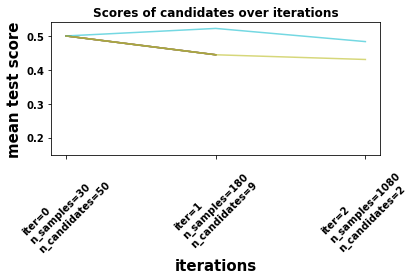

In [461]:
results = pd.DataFrame(rsh.cv_results_)
results["params_str"] = results.params.apply(str)
results.drop_duplicates(subset=("params_str", "iter"), inplace=True)
mean_scores = results.pivot(
    index="iter", columns="params_str", values="mean_test_score"
)
ax = mean_scores.plot(legend=False, alpha=0.6)

labels = [
    f"iter={i}\nn_samples={rsh.n_resources_[i]}\nn_candidates={rsh.n_candidates_[i]}"
    for i in range(rsh.n_iterations_)
]

ax.set_xticks(range(rsh.n_iterations_))
ax.set_xticklabels(labels, rotation=45, multialignment="left")
ax.set_title("Scores of candidates over iterations")
ax.set_ylabel("mean test score", fontsize=15)
ax.set_xlabel("iterations", fontsize=15)
plt.tight_layout()
plt.show()

In [466]:
print(rsh.best_params_)
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
best_random = rsh.best_estimator_

mm = best_random.predict(valid_xs)



print(best_random.get_params())



print("\nThe score for predictions on the 2021 season (not shown to training data) is:\n\
      {:.3f}\n\
\nThe predictions for the training data is:\n\
      {:.3f}".format(best_random.score(valid_xs, valid_y),best_random.score(xs, y)) )

{'n_estimators': 50, 'min_samples_split': 50, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': None, 'class_weight': None, 'ccp_alpha': 0.0, 'bootstrap': True}
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 50, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}

The score for predictions on the 2021 season (not shown to training data) is:
      0.532

The predictions for the training data is:
      0.853


## Look at the predictions

In [467]:
#clf rsh
pred=clf.predict(xs)
pred_valid=clf.predict(valid_xs)

# [(y[i],df['Win_x'].iloc[i]) for i in range(5)]
[(y[i],df['Win_x'].iloc[i],pred[i]) for i in range(5)]

[(2, 'W', 2), (1, 'L', 1), (2, 'W', 2), (2, 'W', 2), (1, 'L', 1)]

win PC actual 33 pred 33
loss PC actual 44 pred 44
draw PC actual 22 pred 22


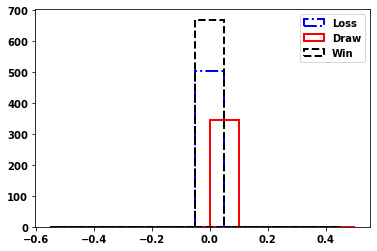

In [468]:
plt.hist(pred[y==1]-1,width=.1,align='left',linewidth=2,linestyle='-.',
         facecolor='none',edgecolor='b')#loss
plt.hist(pred[y==0],width=.1,align='mid',linewidth=2,linestyle='-',
         facecolor='none',edgecolor='r')#draw
plt.hist(pred[y==2]-2,width=.1,align='left',linewidth=2,linestyle='--',
         facecolor='none',edgecolor='k')#win

# Draw=0
# Win=2
# Loss=1
plt.legend(['Loss','Draw','Win'])
pc_loss=int(100*len(y[y==1])/len(pred))
pc_win=int(100*len(y[y==2])/len(pred))
pc_draw=int(100*len(y[y==0])/len(pred))

pc_lossP=int(100*len(pred[pred==1])/len(pred))
pc_winP=int(100*len(pred[pred==2])/len(pred))
pc_drawP=int(100*len(pred[pred==0])/len(pred))

print('win PC actual {} pred {}\n\
loss PC actual {} pred {}\n\
draw PC actual {} pred {}'.format(pc_loss,pc_lossP,pc_win,pc_winP,pc_draw,pc_drawP))

win PC actual 33 pred 35
loss PC actual 42 pred 61
draw PC actual 23 pred 3


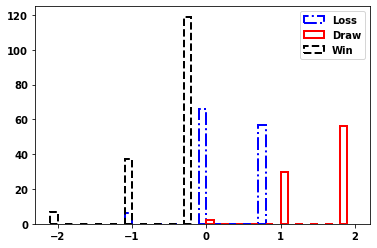

In [469]:
plt.hist(pred_valid[valid_y==1]-1,width=.1,align='left',linewidth=2,linestyle='-.',
         facecolor='none',edgecolor='b')#loss
plt.hist(pred_valid[valid_y==0],width=.1,align='mid',linewidth=2,linestyle='-',
         facecolor='none',edgecolor='r')#draw
plt.hist(pred_valid[valid_y==2]-2,width=.1,align='left',linewidth=2,linestyle='--',
         facecolor='none',edgecolor='k')#win

# Draw=0
# Win=2
# Loss=1
plt.legend(['Loss','Draw','Win'])


pc_loss=int(100*len(valid_y[valid_y==1])/len(pred_valid))
pc_win=int(100*len(valid_y[valid_y==2])/len(pred_valid))
pc_draw=int(100*len(valid_y[valid_y==0])/len(pred_valid))

pc_lossP=int(100*len(pred_valid[pred_valid==1])/len(pred_valid))
pc_winP=int(100*len(pred_valid[pred_valid==2])/len(pred_valid))
pc_drawP=int(100*len(pred_valid[pred_valid==0])/len(pred_valid))

print('win PC actual {} pred {}\n\
loss PC actual {} pred {}\n\
draw PC actual {} pred {}'.format(pc_loss,pc_lossP,pc_win,pc_winP,pc_draw,pc_drawP))

Model seems poor at predicting draws- none are predicted

And poor at losses- 50:50 on those

Because of this lets change the question to a binary one

## Try with a binary question: Does the team win?

In [470]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from xgboost import XGBClassifier
from sklearn.linear_model import Ridge

In [471]:
df=copy.copy(dfAll)
try:
    df=df.drop(columns=['Unnamed: 0'])
except:
    pass
df=df.rename(columns={'Win_x':'Win'})
colsextraX=[x for x in df.columns if  x[-2:]!='_y']
colsextraY=[x for x in df.columns if  x[-2:]!='_x']

#collapse-hide

import copy
df=copy.copy(dfAll)

try:
    df=df.drop(columns=['Unnamed: 0'])
except:
    pass

df=df.rename(columns={'Win_x':'Win'})
df=df.loc[( ((df['round']>1) & (df['season']==2017)) | (df['season']>2017)  ) ]

#     df=df.loc[:,colsextra]

sza=np.shape(df)[0]

randAr=np.random.randint(0,100, size=sza)
cond = randAr>=15

cond = df.season<2021

train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))


#############
want_binary=1
if want_binary==1:
    df.loc[df['Win']=='D','Win']='L'

##############

dep_var='Win'

cont,cat = cont_cat_split(df, 1, dep_var=dep_var)

###############

procs = [Categorify, FillMissing]
to = TabularPandas(df, procs, cat, cont, y_names=dep_var, splits=splits)

xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y






In [475]:
def do_RF():
##############
    clf=RandomForestClassifier(random_state=42)
    clf.fit(xs,y)

    # clf.score(xs,y),clf.score(valid_xs,valid_y)
    pred_valid=clf.predict(valid_xs)
    pred=clf.predict(xs)
    
    ppred_valid=clf.predict_proba(valid_xs)
    ppred=clf.predict_proba(xs)
    
    return pred,pred_valid,ppred,ppred_valid

def do_XGB(n_estimators=1000, learning_rate=0.0001, n_jobs=100):
    # !pip install xgboost
    

    # Define the model
    my_model_2 = XGBClassifier(n_estimators=1000, learning_rate=0.01) # Your code here

    # Fit the model
    my_model_2.fit(xs, y) 

    # Get predictions
    ppred = my_model_2.predict_proba(xs)
    ppred_valid = my_model_2.predict_proba(valid_xs)
    
    pred = my_model_2.predict(xs)
    pred_valid = my_model_2.predict(valid_xs)

    return pred,pred_valid,ppred,ppred_valid 

def do_ridge():
    my_model_2 = Ridge(alpha=21)
    my_model_2.fit(xs, y)
    
    # Get predictions
    ppred = my_model_2.predict(xs)
    ppred_valid = my_model_2.predict(valid_xs)
    
    pred = my_model_2.predict(xs)
    pred_valid = my_model_2.predict(valid_xs)
    
    pred[pred>0.5]=1
    pred[pred<=0.5]=0
    
    pred_valid[pred_valid>0.5]=1
    pred_valid[pred_valid<=0.5]=0

    return pred,pred_valid , ppred,ppred_valid
    
    


pred_RF,pred_valid_RF, ppred_RF,ppred_valid_RF  = do_RF()
pred_XGB,pred_valid_XGB,ppred_XGB,ppred_valid_XGB = do_XGB()
pred_rdg,pred_valid_rdg,ppred_rdg,ppred_valid_rdg = do_ridge()


C:\Users\44781\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.35191e-10): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


10      0
11      0
12      1
13      0
14      1
       ..
1515    1
1516    1
1517    0
1518    0
1519    1
Name: Win, Length: 1510, dtype: int8

In [476]:
pred_combo=(ppred_valid_RF[:,1]+ppred_valid_XGB[:,1])
pred_combo[pred_combo>=1]=1
pred_combo[pred_combo<1] =0

In [477]:
def get_scores(nom,predd, yy):

    prec=precision_score(predd, np.array(yy)) 
    acc=accuracy_score(predd, np.array(yy))

    print("{}: accuracy = {:.2f} and precision = {:.2f}".format(nom,acc,prec))

get_scores('RF train',pred_RF, y)
get_scores('RF valid',pred_valid_RF, valid_y)
print('-----')
get_scores('XGB train',pred_XGB, y)
get_scores('XGB valid',pred_valid_XGB, valid_y)
print('-----')
get_scores('Ridge train',pred_rdg, y)
get_scores('Ridge valid',pred_valid_rdg, valid_y)
print('-----')
get_scores('Combined valid',pred_combo, valid_y)

RF train: accuracy = 1.00 and precision = 1.00
RF valid: accuracy = 0.62 and precision = 0.40
-----
XGB train: accuracy = 1.00 and precision = 1.00
XGB valid: accuracy = 0.61 and precision = 0.36
-----
Ridge train: accuracy = 0.74 and precision = 0.68
Ridge valid: accuracy = 0.59 and precision = 0.44
-----
Combined valid: accuracy = 0.59 and precision = 0.33


## Try reducing the predictors

There is a lot of variance, do we need all the columns and what accuracy do we get with just a few basic ones?

In [599]:
##hide
df_=pd.read_csv(folda+'epl2017-2021.csv')
df_=df_.iloc[10:,:]

predictors=['day','opponent_x','team_x','weekday']

df_["opponent_x"] = df_["opponent_x"].astype("category").cat.codes
df_["team_x"] = df_["team_x"].astype("category").cat.codes

def dowin(string):
    if string=='W':
        return 1
    else:
        return 0
df_['Win_x']=df_['Win_x'].apply(dowin)

predictors.append('Win_x')
predictors.append('season')

df=df_.copy()
df=df.loc[:,predictors]
df=df.dropna()

train = df.loc[df["season"] <= 2020,:]
test = df.loc[df["season"] > 2020,:]

print('Length of training and test data: ',len(train) , len(test))
# RandomForestClassifie
rf = RandomForestClassifier()#n_estimators = 40, min_samples_split =10, random_state = 1)
print('The predictors ', predictors[0:-2])
predictors=predictors[0:-2]
rf.fit(train[predictors], train['Win_x'])
pred = rf.predict(test[predictors])
pred_train = rf.predict(train[predictors])


print("The accuracy {:.3f} and precision {:.3f} of the training data".format(accuracy_score(train['Win_x'], pred_train),precision_score(train['Win_x'], pred_train) ) )
print("The accuracy {:.3f} and precision {:.3f} of the test data".format(accuracy_score(test['Win_x'], pred),precision_score(test['Win_x'], pred) ) )


Length of training and test data:  1510 380
The predictors  ['day', 'opponent_x', 'team_x', 'weekday']
The accuracy 0.996 and precision 0.997 of the training data
The accuracy 0.621 and precision 0.565 of the test data


In [489]:
matchesC=pd.read_csv(folda+'epl2017-2021_wivnetscore.csv')

X=matchesC.corr()
val =[ i for i,x in enumerate(X.columns) if x=='NetScore_x'][0]

corrnetscore=X.iloc[:,val:val+1].sort_values(by="NetScore_x").reset_index()
corrnetscore=corrnetscore.rename(columns={'index':'category'})
corrnetscore


,category,NetScore_x
0,NetScore_y,-1.000000
1,ground_y,-0.264919
2,cmp_passing.2_y,-0.264773
3,cmp_passing_y,-0.263268
4,rec_y,-0.263268
...,...,...
336,att_passing_x,0.307719
337,carries_x,0.307754
338,live_passing_types_x,0.307866
339,mid 3rd_possession_x,0.309859


In [724]:
Xuse=corrnetscore.loc[[x   for x in corrnetscore.index if ( (corrnetscore.loc[x,'category'][-1]=='x') & ( abs(corrnetscore.loc[x,'NetScore_x'])>0.26) )]]
Xuse=corrnetscore.loc[[x   for x in corrnetscore.index if ( (corrnetscore.loc[x,'category'][-1]=='y') & ( abs(corrnetscore.loc[x,'NetScore_x'])>0.24) )]]

Xuse=corrnetscore.loc[[x   for x in corrnetscore.index if (  ( abs(corrnetscore.loc[x,'NetScore_x'])>0.27) )]]

Xuse=list(Xuse[-20:-1].category.values)
Xuse

['att_passing.1_x',
 '1/3_passing_x',
 'prgdist_possession_x',
 'ground_x',
 'cmp_passing.2_x',
 'att_passing.2_x',
 'totdist_passing_x',
 'touches_x',
 'cmp_passing_types_x',
 'cmp_passing_x',
 'rec_x',
 'targ_x',
 'live_possession_x',
 'prog_possession_x',
 'att_passing_types_x',
 'att_passing_x',
 'carries_x',
 'live_passing_types_x',
 'mid 3rd_possession_x']

In [848]:
##hide
df_=pd.read_csv(folda+'epl2017-2021_wivnetscore_both-HA.csv')
df_=df_.iloc[10:,:]

predictors_=['round','opponent_x','team_x','weekday']

df_["opponent_x"] = df_["opponent_x"].astype("category").cat.codes
df_["team_x"] = df_["team_x"].astype("category").cat.codes


df_=df_[df_['Win_x']!='D']

def dowin(string):
    if string=='W':
        return 1
    else:
        return 0
df_['Win_x']=df_['Win_x'].apply(dowin)

predictors=Xuse.copy()

[predictors.append(x) for x in predictors_]


predictors.append('season')
predictors.append('Win_x')




df=df_.copy()
df=df.loc[:,predictors]
df=df.dropna()

train = df.loc[df["season"] <= 2020,:]
test = df.loc[df["season"] > 2020,:]

print('Length of training and test data: ',len(train) , len(test))
# RandomForestClassifie
rf = RandomForestClassifier(n_estimators = 200, min_samples_split =4, random_state = 1)
print('The predictors ', predictors[0:-2])
predictors=predictors[0:-1]
rf.fit(train[predictors], train['Win_x'])
pred = rf.predict(test[predictors])
pred_train = rf.predict(train[predictors])


print("The accuracy {:.3f} and precision {:.3f} of the training data".\
format(accuracy_score(train['Win_x'], pred_train),precision_score(train['Win_x'], pred_train) ) )

print("The accuracy {:.3f} and precision {:.3f} of the test data".\
format(accuracy_score(test['Win_x'], pred),precision_score(test['Win_x'], pred) ) )


Length of training and test data:  2329 583
The predictors  ['att_passing.1_x', '1/3_passing_x', 'prgdist_possession_x', 'ground_x', 'cmp_passing.2_x', 'att_passing.2_x', 'totdist_passing_x', 'touches_x', 'cmp_passing_types_x', 'cmp_passing_x', 'rec_x', 'targ_x', 'live_possession_x', 'prog_possession_x', 'att_passing_types_x', 'att_passing_x', 'carries_x', 'live_passing_types_x', 'mid 3rd_possession_x', 'round', 'opponent_x', 'team_x', 'weekday']
The accuracy 1.000 and precision 1.000 of the training data
The accuracy 0.633 and precision 0.651 of the test data


In [708]:
combined = pd.DataFrame(dict(actual = test['Win_x'], prediction = pred ))
crosstab=pd.crosstab(index = combined["actual"], columns = combined['prediction'])
crosstab
# crosstab=np.array(crosstab)

# # sum(crosstab.diagonal())/
# crosstab,np.sum(crosstab),np.sum(crosstab, axis=1)
# # crosstab


prediction,0,1
actual,,
0,180,111
1,88,204


In [856]:
# df.groupby(columns=['season','round',])

dfnew=df.copy()

dfnew = dfnew.loc[df["season"] > 2020,:]
def team_combo_unq(inta1,inta2):
    a2=np.array([inta1,inta2])
    a=np.sort(a2)
    stra = str(int(a[0]))+' '+ str(int(a[1]))
    return stra 
def team_combo2(inta1,inta2):
    a2=np.array([inta1,inta2])
    a=np.sort(a2)
    stra = str(int(a[0]))+' '+ str(int(a[1]))
    if np.array_equal(a,a2):
        return  'te'
    else:
        return  'op'

team_combo_unq(2,3)

dfnew['team_unq']=dfnew.apply(lambda x: team_combo_unq(x['team_x'],x['opponent_x']), axis=1)
dfnew['team_opp']=dfnew.apply(lambda x: team_combo2(x['team_x'],x['opponent_x']), axis=1)

pred__=rf.predict_proba(dfnew[predictors])
pred__2=rf.predict(dfnew[predictors])
dfnew['pred']= pred__[:,1]
dfnew['predAct']= pred__2


dfnew.loc[dfnew.team_opp=='op','pred']=1-dfnew.loc[dfnew.team_opp=='op','pred']
dfnew.loc[dfnew.team_opp=='op','predAct']=1-dfnew.loc[dfnew.team_opp=='op','predAct']

dfnew.loc[dfnew.team_opp=='op','Win_x']=1-dfnew.loc[dfnew.team_opp=='op','Win_x']
# a=np.array([1 ,3])
# a

In [857]:
A=dfnew['Win_x']
B=dfnew[['predAct']]
print("The accuracy {:.3f} and precision {:.3f} of the test data".\
format(accuracy_score(A, B),precision_score(A, B) ) )

The accuracy 0.633 and precision 0.647 of the test data


In [858]:

pred_df=dfnew.loc[:,['Win_x','team_x','season','opponent_x','round','team_unq','pred','team_opp','predAct']].groupby(by=['season','round','team_unq']).mean()

def bina(numa):
    if numa<0.5:
        return 0
    else:
        return 1

pred_df['pred_bin']=pred_df['pred'].apply(bina)
pred_df['predAct']=pred_df['predAct'].apply(bina)

A=np.array(pred_df['Win_x'])
B=pred_df['pred_bin']
print("The accuracy {:.3f} and precision {:.3f} of the test data".\
format(accuracy_score(A, B),precision_score(A, B) ) )

A=pred_df['Win_x']
B=np.array(pred_df[['predAct']])
print("The accuracy {:.3f} and precision {:.3f} of the test data".\
format(accuracy_score(A, B),precision_score(A, B) ) )

pred_df


The accuracy 0.647 and precision 0.671 of the test data
The accuracy 0.651 and precision 0.619 of the test data


Win_x  team_x  opponent_x      pred  predAct  pred_bin
season round team_unq                                                        
2021   1     0 3         0.0     0.0         3.0  0.614917        1         1
             1 24        0.0    12.5        12.5  0.483089        1         0
             12 16       0.0    14.0        14.0  0.364101        0         0
             13 27       1.0    20.0        20.0  0.492810        1         0
             14 18       1.0    16.0        16.0  0.712417        1         1
...                      ...     ...         ...       ...      ...       ...
       38    3 12        0.0     7.5         7.5  0.535958        1         1
             4 26        1.0    15.0        15.0  0.490208        1         0
             5 17        0.0    11.0        11.0  0.536071        1         1
             7 24        1.0    15.5        15.5  0.604250        1         1
             8 16        1.0    12.0        12.0  0.431250        0         0

[292 rows x 6 columns]

In [833]:
# dfnew[['Win_x','team_x','season','opponent_x','round','team_unq','pred','team_opp','predAct']]
accuracy_score(np.array(dfnew[['predAct']]), dfnew[['Win_x']] ) 

0.501717032967033

In [669]:
df_=pd.read_csv(folda+'epl2017-2021_wivnetscore_both-HA.csv')
df_=df_.iloc[10:,:]
print(len(df_.loc[df_.Win_x=='W']),len(df_.loc[df_.Win_x=='L']) )

df_[['team_x','team_y','round','Win_x']].iloc[0:11]

1461 1464


,team_x,team_y,round,Win_x
10,Crystal Palace,Huddersfield Town,1,L
11,Bournemouth,West Bromwich Albion,1,L
12,West Ham United,Manchester United,1,L
13,Watford,Liverpool,1,D
14,Brighton and Hove Albion,Manchester City,1,L
15,Huddersfield Town,Crystal Palace,1,W
16,Southampton,Swansea City,1,D
17,Swansea City,Southampton,1,D
18,Stoke City,Everton,1,L
19,West Bromwich Albion,Bournemouth,1,W


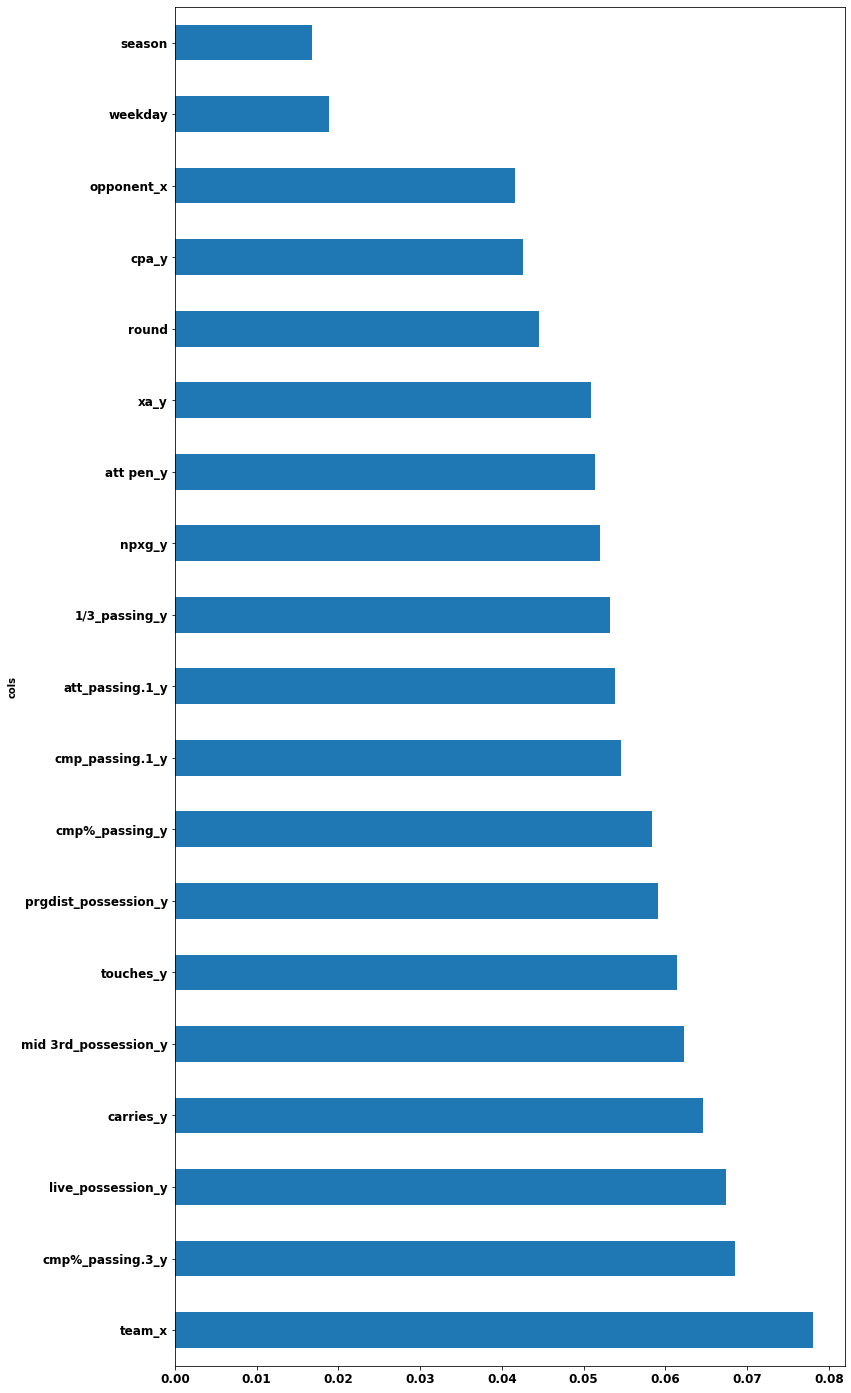

In [706]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

# pred=rf.predict(train)
# pred_valid=best_random.predict(valid_xs)
fi = rf_feat_importance(rf, train[predictors])

def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,25), legend=False,fontsize=12)

plot_fi(fi[:50]);

In [548]:
#collapse-output
predictors2=predictors.copy()
predictors2.append('season')
predictors2.append('Win_x')

dfAll=pd.read_csv(folda+'epl2017-2021_wivnetscore.csv')
dfAll=dfAll.loc[10:,predictors2]
dfAll

,att_passing.2_x,totdist_passing_x,touches_x,cmp_passing_types_x,cmp_passing_x,rec_x,targ_x,live_possession_x,prog_possession_x,att_passing_types_x,att_passing_x,carries_x,live_passing_types_x,mid 3rd_possession_x,day,opponent_x,team_x,weekday,season,Win_x
10,346.000000,13422.000000,902.000000,712.000000,712.000000,712.000000,794.000000,858.000000,91.000000,808.000000,808.000000,646.000000,766.000000,484.000000,21,Everton,Manchester City,0,2017,D
11,330.000000,12334.000000,870.000000,665.000000,665.000000,665.000000,747.000000,823.000000,72.000000,757.000000,757.000000,598.000000,710.000000,420.000000,20,Chelsea,Tottenham Hotspur,6,2017,L
12,218.000000,8070.000000,658.000000,388.000000,388.000000,388.000000,505.000000,603.000000,35.000000,515.000000,515.000000,349.000000,458.000000,323.000000,19,Crystal Palace,Liverpool,5,2017,W
13,135.000000,6011.000000,469.000000,251.000000,251.000000,251.000000,322.000000,428.000000,16.000000,331.000000,331.000000,259.000000,289.000000,232.000000,19,West Bromwich Albion,Burnley,5,2017,L
14,79.000000,4126.000000,435.000000,181.000000,181.000000,181.000000,284.000000,370.000000,22.000000,299.000000,299.000000,202.000000,232.000000,169.000000,19,Brighton and Hove Albion,Leicester City,5,2017,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,167.000000,7080.666667,572.666667,353.666667,353.666667,353.666667,428.333333,529.666667,42.000000,453.000000,453.000000,327.333333,410.000000,236.000000,22,West Ham United,Brighton and Hove Albion,6,2021,W
1896,233.000000,9669.333333,672.000000,457.666667,457.666667,457.666667,512.333333,622.666667,36.333333,556.000000,556.000000,462.666667,505.000000,295.333333,22,Manchester United,Crystal Palace,6,2021,W
1897,171.000000,7650.000000,552.666667,359.000000,359.000000,359.000000,413.666667,510.333333,39.666667,457.000000,457.000000,333.666667,415.000000,220.666667,22,Leeds United,Brentford,6,2021,L
1898,148.666667,6493.333333,524.333333,295.666667,295.666667,295.666667,362.333333,478.333333,30.333333,407.333333,407.333333,310.333333,360.000000,259.333333,22,Newcastle United,Burnley,6,2021,L


In [581]:
df=copy.copy(dfAll)
try:
    df=df.drop(columns=['Unnamed: 0'])
except:
    pass
df=df.rename(columns={'Win_x':'Win'})

def dowin(string):
    if string=='W':
        return 1
    else:
        return 0
df['Win']=df['Win'].apply(dowin)
sza=np.shape(df)[0]

randAr=np.random.randint(0,100, size=sza)
cond = randAr>=15

cond = df.season<2021

train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))


##############

dep_var='Win'

cont,cat = cont_cat_split(df, 1, dep_var=dep_var)

###############

procs = [Categorify, FillMissing]
to = TabularPandas(df, procs, cat, cont, y_names=dep_var, splits=splits)

xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y






In [536]:
from sklearn.ensemble import RandomForestRegressor

In [592]:
def do_RF(xs,y,valid_xs):
##############
    clf=RandomForestClassifier(random_state=42)
    clf.fit(xs,y)

    # clf.score(xs,y),clf.score(valid_xs,valid_y)
    pred_valid=clf.predict(valid_xs)
    pred=clf.predict(xs)
    
#     ppred_valid=clf.predict_proba(valid_xs)
#     ppred=clf.predict_proba(xs)
    
    return pred,pred_valid,clf#,ppred,ppred_valid

   
pred,pred_val,clf=do_RF(xs,y,valid_xs)

In [595]:
# new_preds,new_y=get_reg_scores(valid_y,pred_val,.5)


print("The accuracy {:.3f} and precision {:.3f} of the train data".format(\
  accuracy_score(y, pred),precision_score(y, pred) ) )
print("The accuracy {:.3f} and precision {:.3f} of the test data".format(\
  accuracy_score(valid_y, pred_val),precision_score(valid_y, pred_val) ) )


The accuracy 1.000 and precision 1.000 of the train data
The accuracy 0.637 and precision 0.662 of the test data


In [598]:
combined = pd.DataFrame(dict(actual = valid_y, prediction = pred_val ))
crosstab=pd.crosstab(index = combined["actual"], columns = combined['prediction'])
crosstab
# crosstab=np.array(crosstab)

# sum(crosstab.diagonal())/sum(sum(crosstab))
# # crosstab


prediction,0,1
actual,,
0,191,26
1,112,51


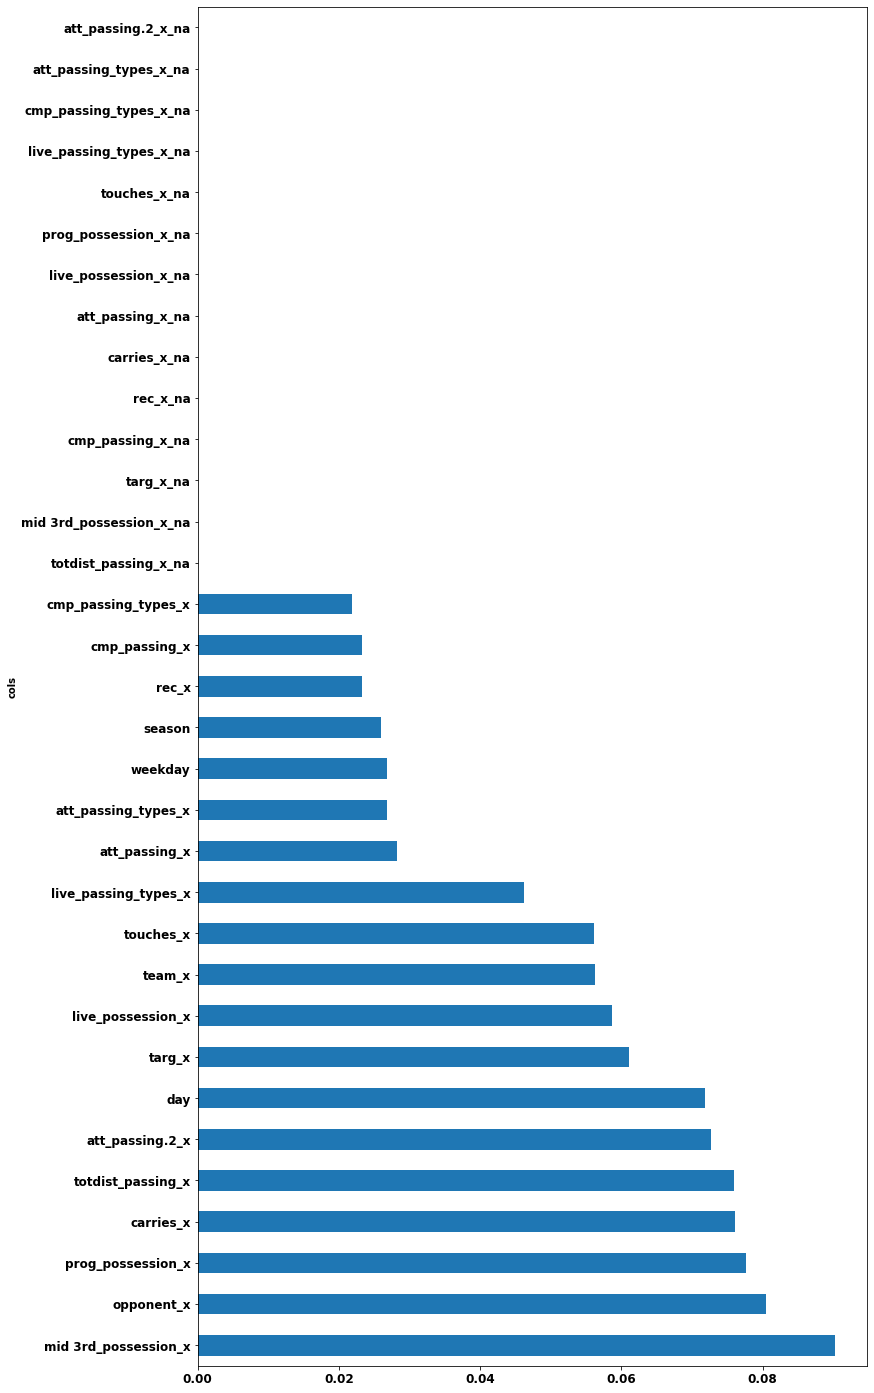

In [556]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

# pred=rf.predict(train)
# pred_valid=best_random.predict(valid_xs)
fi = rf_feat_importance(clf, xs)

def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,25), legend=False,fontsize=12)

plot_fi(fi[:50]);